# Student Performance Indicator

Life cycle of machine learning project
    
    1) Understanding the Problem Statement
    2) Data Collection
    3) Data Checks to perform
    4) Exploratory Data Analysis
    5) Data Pre-Processing
    6) Model Training
    7) Choose best Model

# 1) Problem Statement

=> This Project understand how the student's performance (test score) is affected by other variable such as Gender, Ethnicity,
   Parental level of eduction, Lunch and Test preparation course.

# 2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/student-performance-in-exams?datasetId=74977

The data consist of 8 column and 1000 rows.

# 2.1) Import Data and Required Packages

## Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

: 

## Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv(r"C:\Users\DB0186AU\Downloads\Student exam.csv")

# Show top 5 record

In [6]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# Shape of Dataset

In [7]:
df.shape

(1000, 8)

# 2.2 Dataset Information

# 3) Data Checks to perform

# 3.1) Check Missing Values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## There is no missing values in the dataset.

# 3.2) Check Duplicates

In [9]:
df.duplicated().sum()

1

## There is only one duplicates row then it's okay to proceed.

# 3.3) Check Data type

In [10]:
# Check null and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4) Checking the number of unique value of each column

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

# 3.5) Check statistics of data set

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


# Insight

# Exploring Data

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [16]:
df['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [17]:
print("Categories in 'gender' variable:", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:", end = " ")
print(df['test preparation course'].unique())

Categories in 'gender' variable: ['male' 'female']
Categories in 'race/ethnicity' variable: ['group A' 'group D' 'group E' 'group B' 'group C']
Categories in 'parental level of education' variable: ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['completed' 'none']


In [18]:
# Define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("We have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("\nWe have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [19]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55


# Adding Columns for "Total Score" and "Average Score"

In [21]:
# for Total score
df["total score"] = df["math score"] + df["reading score"] + df['writing score']

# For Average score
df["average score"] = df["total score"]/3

df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,male,group A,high school,standard,completed,67,67,63,197,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,154,51.333333


In [22]:
math_full = df[df["math score"]==100]['average score'].count()
writing_full = df[df["writing score"]==100]['average score'].count()
reading_full = df[df["reading score"] == 100]['average score'].count()

print(f'Number of student with full marks in Maths: {math_full}')
print(f'Number of student with full marks in Reading: {reading_full}')
print(f'Number of student with full marks in Writing: {writing_full}')

Number of student with full marks in Maths: 14
Number of student with full marks in Reading: 19
Number of student with full marks in Writing: 18


In [23]:
math_less_20 = df[df['math score'] <=20]['average score'].count()
reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average score'].count()

print(f'Number of student with less than 20 marks in Maths: {math_less_20}')
print(f'Number of student with less than 20 marks in Reading: {reading_less_20}')
print(f'Numner of student with less than 20 marks in Writing: {writing_less_20}')

Number of student with less than 20 marks in Maths: 2
Number of student with less than 20 marks in Reading: 0
Numner of student with less than 20 marks in Writing: 0


## Insight

# 4) Exploratory Data Analysis (Visualization)

## 4.1) Visualize average score distrinbution to make some conclusion

# 4.1.1 Histogram & KDE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

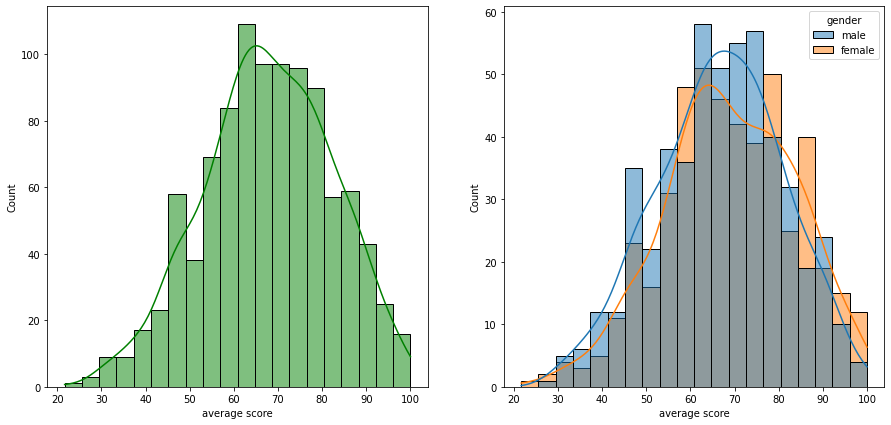

In [26]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average score', kde = True, bins = 20, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average score',  kde = True, hue = 'gender')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

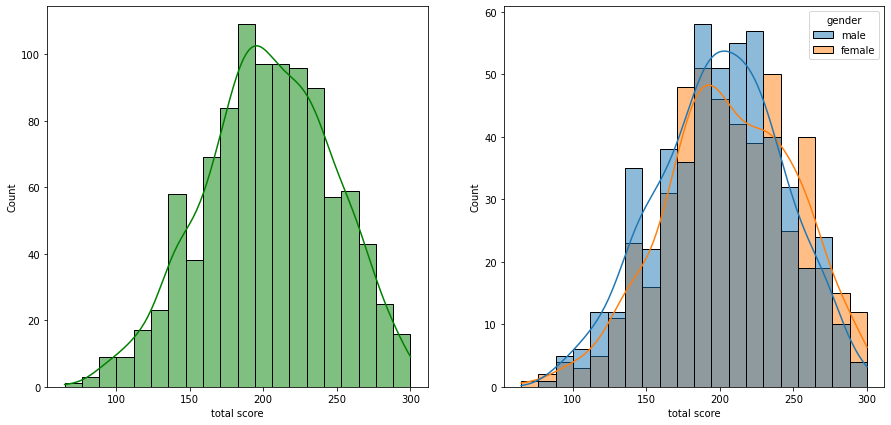

In [38]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total score', kde = True, bins = 20, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total score', kde = True, hue = 'gender')
plt.show()

# Insight

Male Students tend to perform well than female students

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

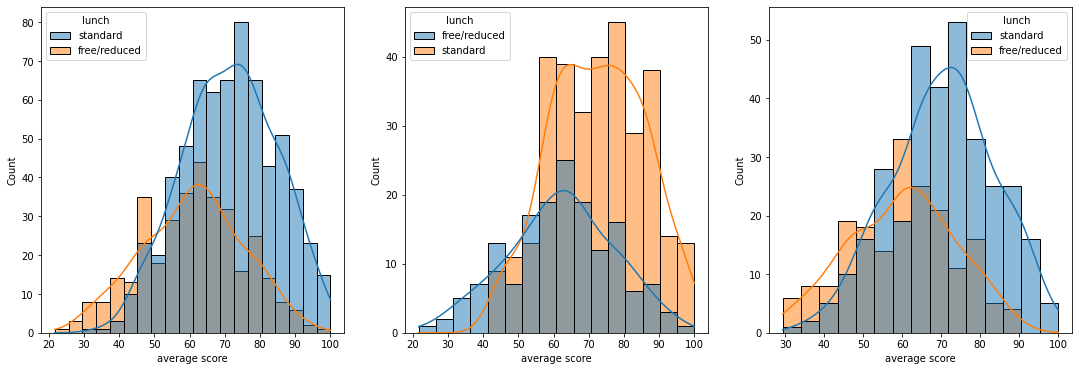

In [36]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average score', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average score', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average score', kde = True, hue = 'lunch')
plt.show()

# Insight

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

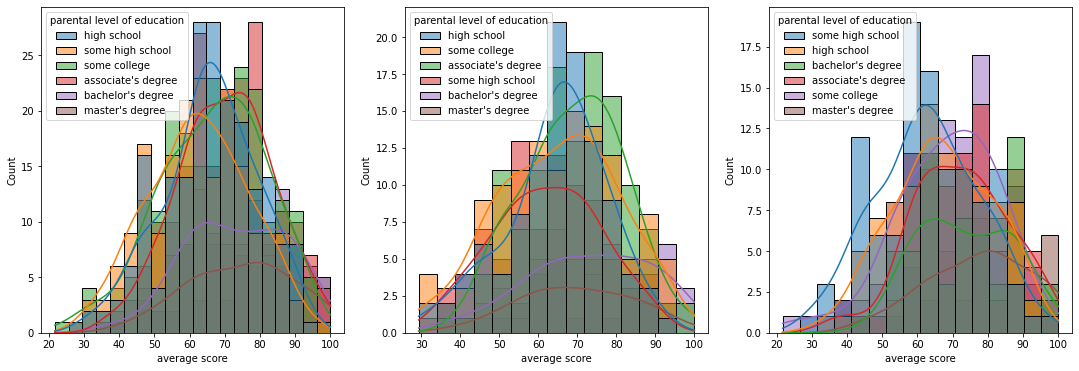

In [45]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average score', kde = True, hue = 'parental level of education')
plt.subplot(142)
ax = sns.histplot(data = df [df.gender == 'male'], x = 'average score', kde = True, hue = 'parental level of education')
plt.subplot(143)
ax = sns.histplot(data = df [df.gender == 'female'], x = 'average score', kde = True, hue = 'parental level of education')
plt.show()

# Insight

In [42]:
df['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

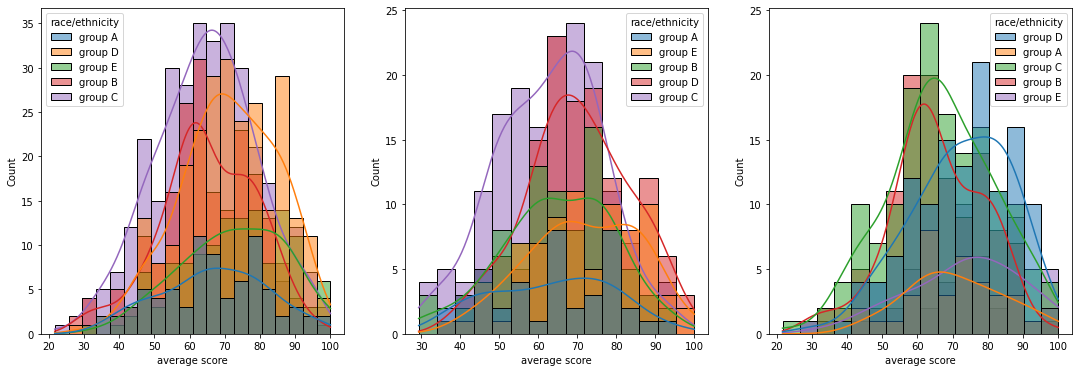

In [48]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average score', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data = df [df.gender == 'male'], x = 'average score', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data = df [df.gender == 'female'], x = 'average score', kde = True, hue = 'race/ethnicity')
plt.show()

# Insight

# 4.2) Maximum score of students in all three subjects

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

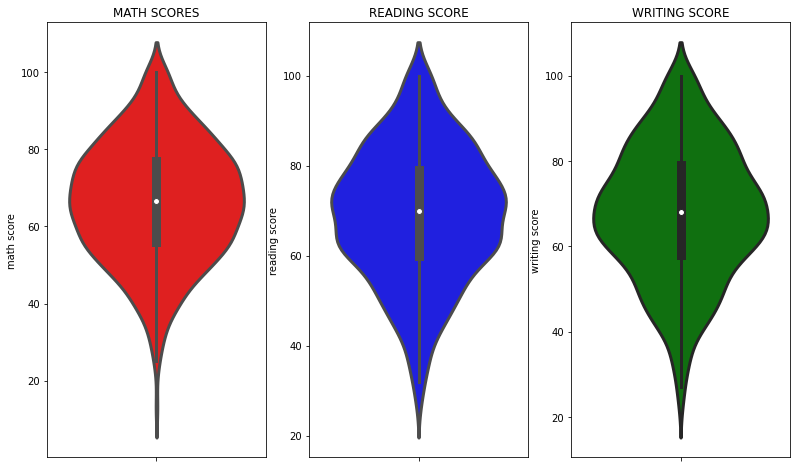

In [49]:
plt.figure(figsize = (18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORES")
sns.violinplot(y = 'math score', data = df, color = 'red', linewidth = 3)
plt.subplot(1,4,2)
plt.title("READING SCORE")
sns.violinplot(y = 'reading score', data = df, color = 'blue', linewidth = 3)
plt.subplot(1,4,3)
plt.title("WRITING SCORE")
sns.violinplot(y = 'writing score', data = df, color = 'green', linewidth = 3)
plt.show()

# Insight

# 4.3) Multivariate analysis using pieplot

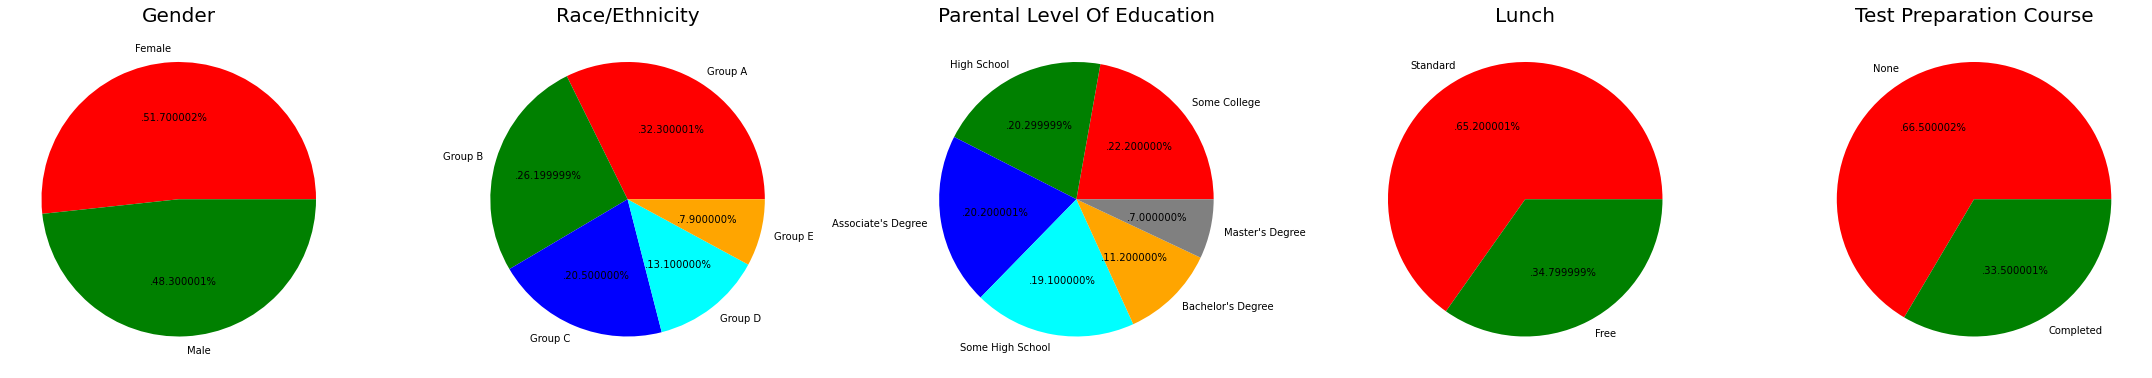

In [53]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors= color, labels = labels, autopct = '.%2f%%')
plt.title('Gender',  fontsize = 20)
#lt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors= color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
#plt.axis("off")

plt.subplot(1,5,3)
size = df['parental level of education'].value_counts()
labels = 'Some College', 'High School', "Associate's Degree", "Some High School", "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors= color, labels = labels, autopct = '.%2f%%')
plt.title("Parental Level Of Education", fontsize = 20)
#lt.axis("off")

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors= color, labels = labels, autopct = '.%2f%%')
plt.title("Lunch", fontsize = 20)
#lt.axis = ('off')

plt.subplot(1,5,5)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors= color, labels = labels, autopct = '.%2f%%')
plt.title("Test Preparation Course", fontsize = 20)
#lt.axis("off")

plt.tight_layout()
plt.grid()

plt.show()

# Insights

# 4.4 Feature Wise Visualization

# 4.4.1 Gender Column

# UNIVARIATE ANALYSIS ( how id distribution of Gender?)

<IPython.core.display.Javascript object>

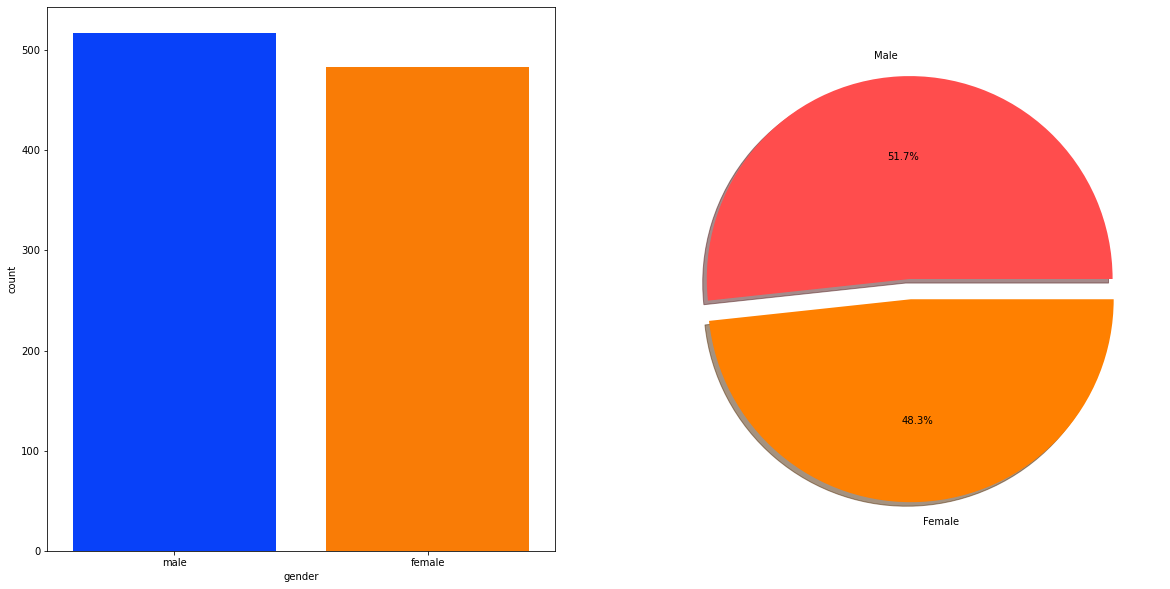

In [55]:
f, ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
#for container in ax[0].containers:
#    ax[0].bar_label(container, color = 'black', size = 20)
    
plt.pie(x = df['gender'].value_counts(), colors = ['#ff4d4d', '#ff8000'], labels = ['Male', 'Female'], explode = [0,0.1], autopct = '%1.1f%%', shadow = True)
plt.show()

# Insight

# Bivariate Analysis (Is gender has any impact on Student's performance?)

In [56]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.196687,71.888199,71.708075,206.792961,68.930987
male,69.384913,66.305609,64.029014,199.719536,66.573179


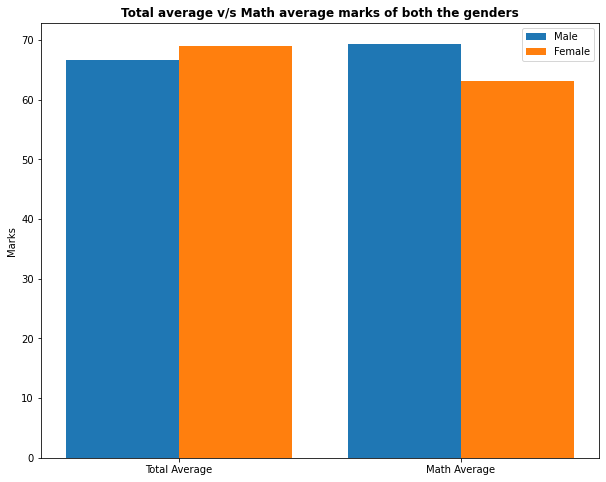

In [57]:
plt.figure(figsize = (10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight = 'bold')
plt.legend()
plt.show()

# Insight

# 4.4.2) Race/Ethnicity Column

In [62]:
df['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

<IPython.core.display.Javascript object>

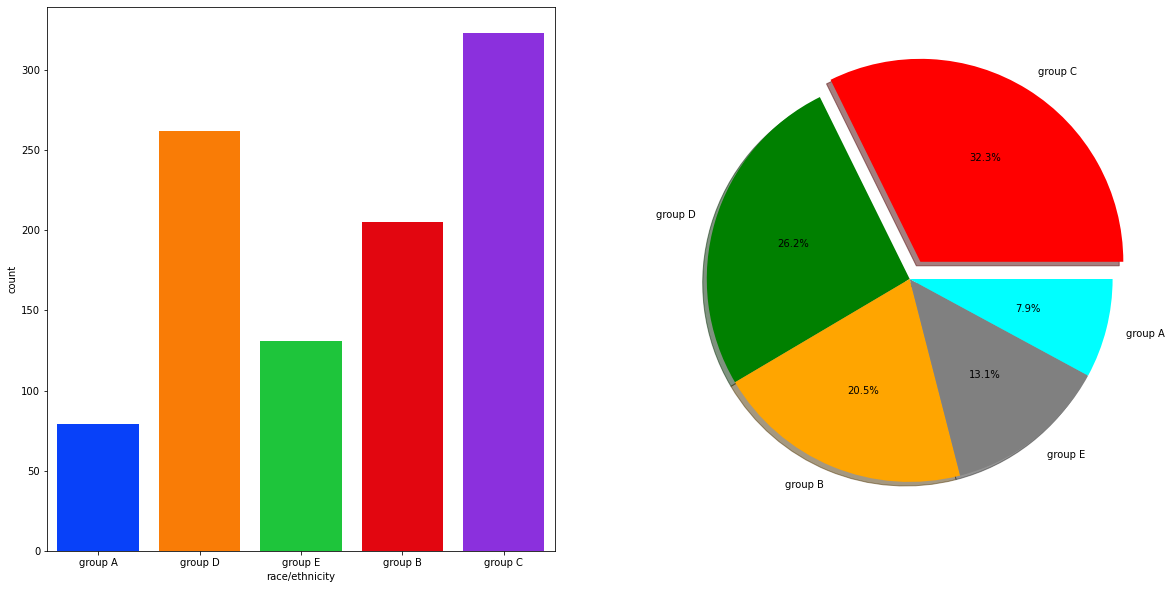

In [64]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x = df['race/ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)

plt.pie(x = df['race/ethnicity'].value_counts(), labels = ['group C', 'group D', 'group B', 'group E', 'group A'], explode = [0.1,0,0,0,0], autopct = '%1.1f%%', shadow = True, colors = ('red', 'green', 'orange', 'grey', 'cyan') )
plt.show()

# Insight

# Bivariate Anaysis (is Race/Ethnicity has any impact on Student's Performance)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Writing Score')

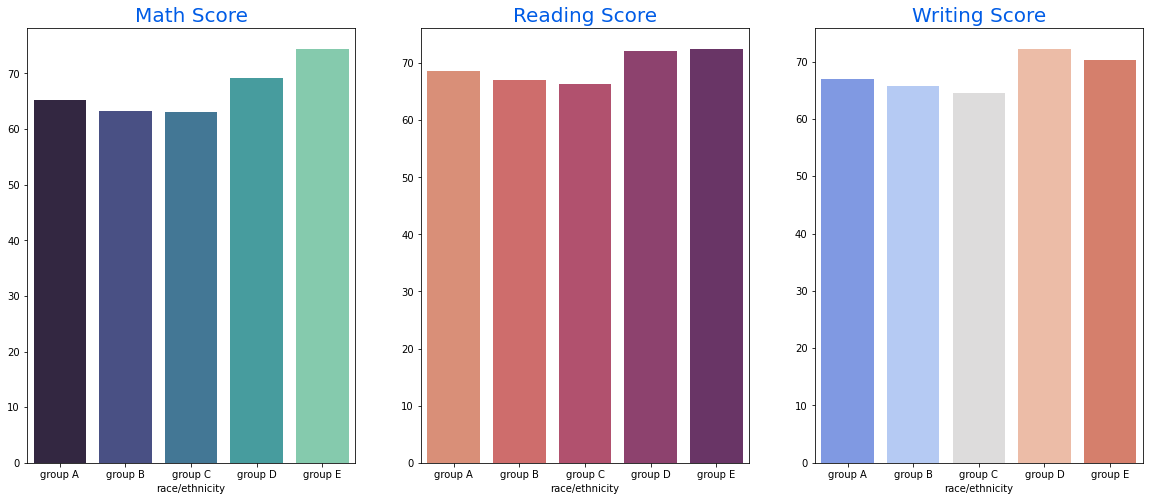

In [65]:
Group_data2 = df.groupby('race/ethnicity')
f,ax = plt.subplots(1,3, figsize = (20,8))

sns.barplot(x = Group_data2['math score'].mean().index, y = Group_data2['math score'].mean().values, palette = 'mako', ax = ax[0])
ax[0].set_title('Math Score', color = '#005ce6', size = 20)

sns.barplot(x = Group_data2['reading score'].mean().index, y = Group_data2['reading score'].mean().values, palette = 'flare', ax = ax[1])
ax[1].set_title('Reading Score', color = '#005ce6', size = 20)

sns.barplot(x = Group_data2['writing score'].mean().index, y = Group_data2['writing score'].mean().values, palette = 'coolwarm', ax = ax[2])
ax[2].set_title('Writing Score', color = '#005ce6', size = 20)

# Insights

# 4.4.3) Parental Level Of Education Column

# UNIVARIATE ANALYSIS (What is educational background of student's parent?)

<IPython.core.display.Javascript object>

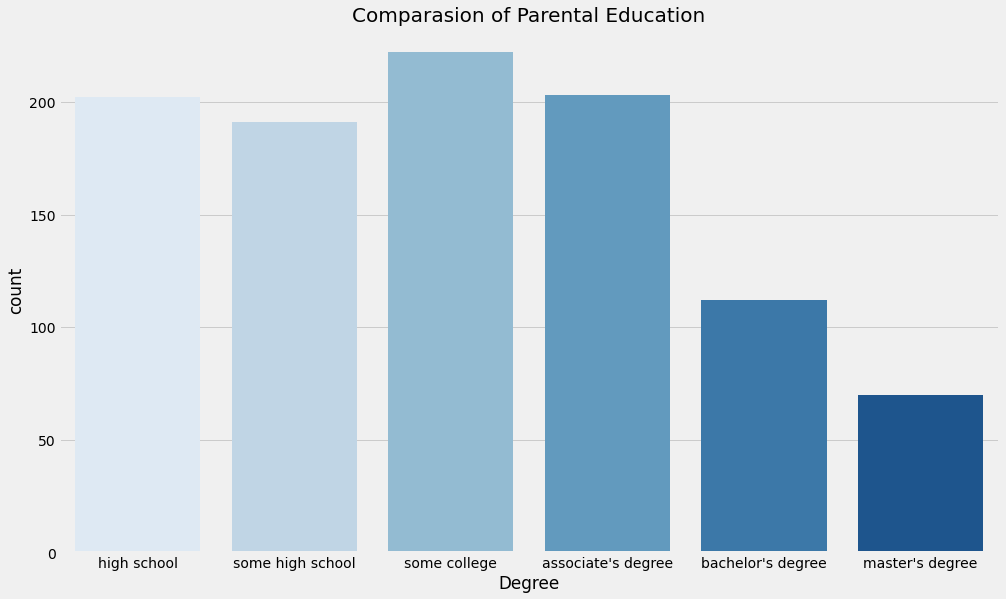

In [68]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparasion of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# Insight

# BIVARIATE ANALYSIS ( Is Parental education has any impact on student's performance)

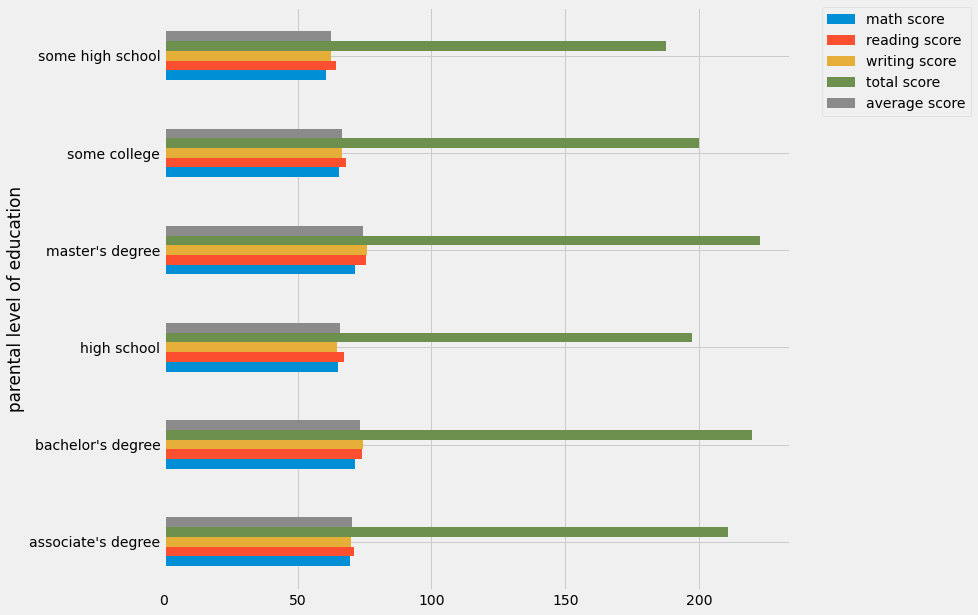

In [69]:
df.groupby('parental level of education').agg('mean').plot(kind = 'barh', figsize = (10,10))
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)
plt.show()

# Insight

# 4.4.4) Lunch Column

# UNIVARIATE ANALYSIS (Which type of lunch is most common amoung students?)

<IPython.core.display.Javascript object>

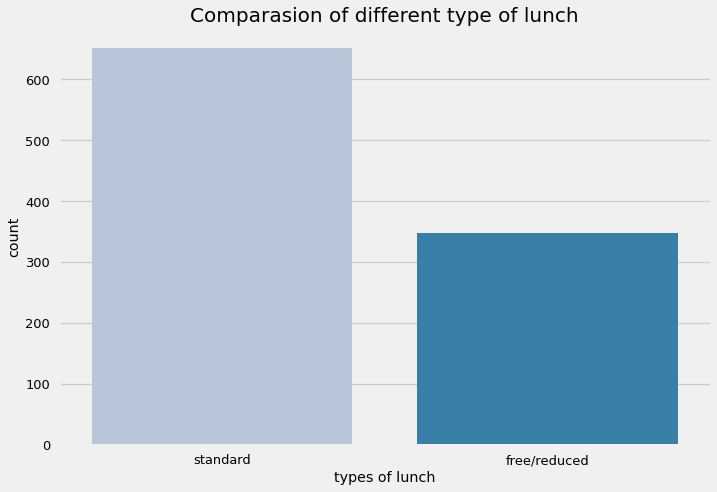

In [71]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparasion of different type of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

# Insight

# BIVARIATE ANALYSIS(Is lunch type intake has any impact on student's performance)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Students vs lunch')

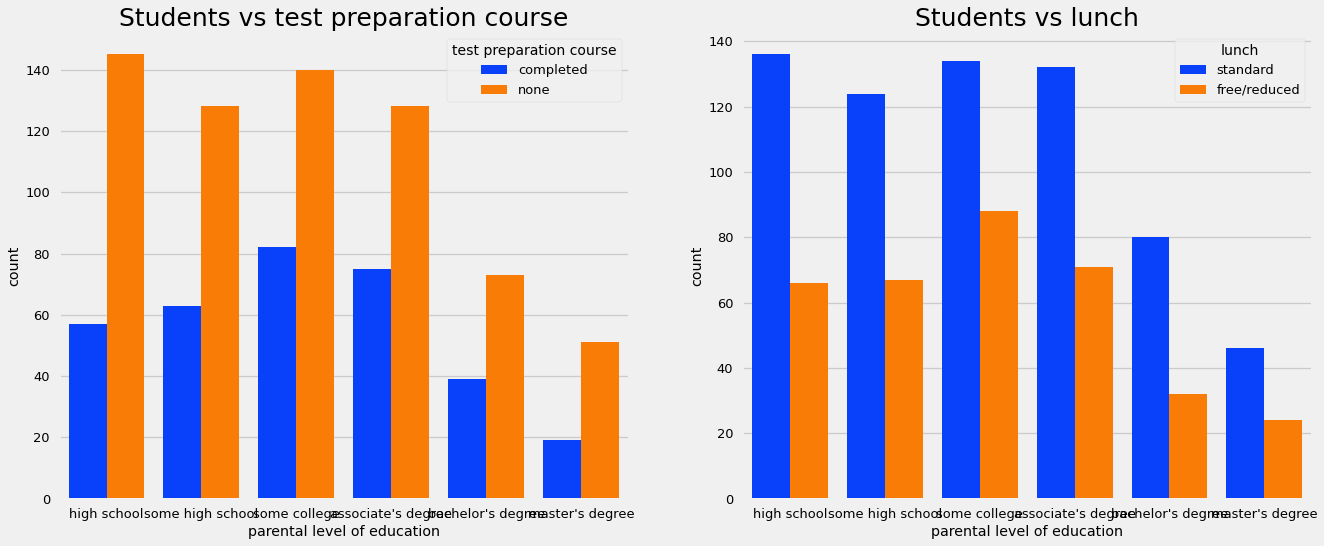

In [74]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.countplot(x = df['parental level of education'], data = df, palette = 'bright', hue = 'test preparation course' , saturation = 0.95, ax = ax[0])
ax[0].set_title('Students vs test preparation course' , color = 'black', size = 25)

sns.countplot(x = df['parental level of education'], data = df, palette = 'bright', hue = 'lunch', saturation = 0.95, ax = ax[1])
ax[1].set_title('Students vs lunch', color = 'black', size = 25)

# Insight

# 4.4.5(TEST PREPARATION COURSE COLUMN)

# UNIVARIATE ANAYSIS (Which type test preparation course is most common amoung student?)

<IPython.core.display.Javascript object>

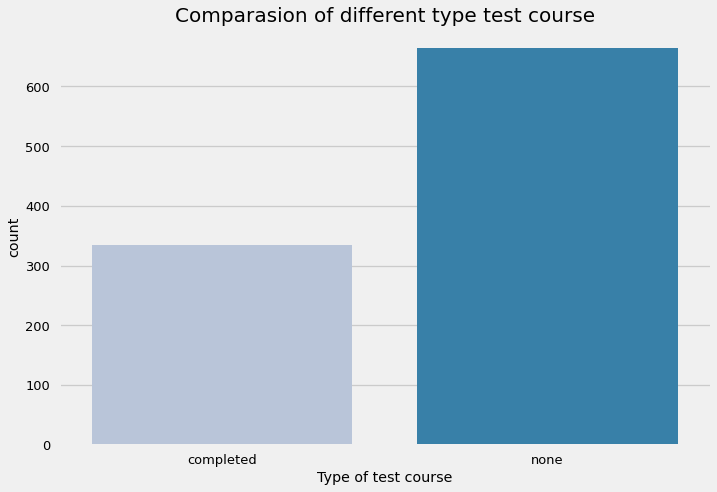

In [77]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['test preparation course'], palette = 'PuBu')
plt.title('Comparasion of different type test course', fontweight = 30, fontsize = 20)
plt.xlabel('Type of test course')
plt.ylabel('count')
plt.show()

# BIVARIATE ANALYSIS(Is test preparation course has any impact on student's performance)

<IPython.core.display.Javascript object>

ValueError: Length of passed values is 1, index implies 1000.

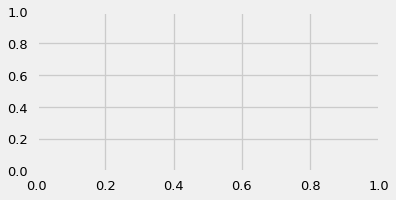

In [80]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
sns.barplot(x = df['lunch'], y = df['math score'], hue = ['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x = df['lunch'], y = df['reading score'], hue = ['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x = df['lunch'], y = df['writing score'], hue = ['test preparation course'])


# Insight

# 4.4.6) CHECKING OUTLIERS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

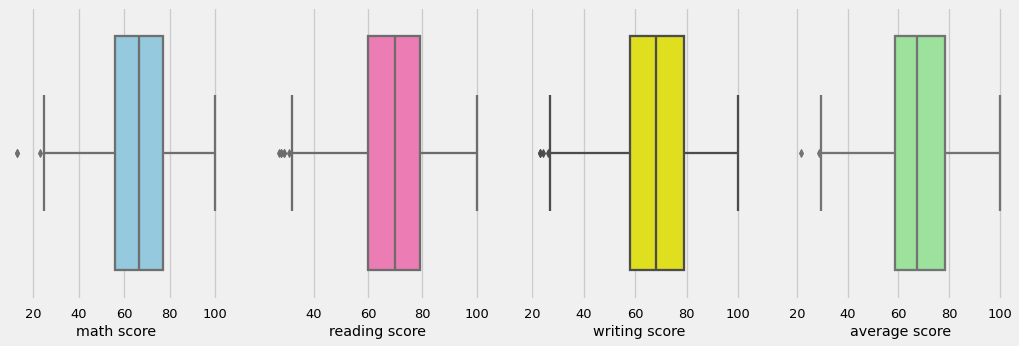

In [81]:
plt.subplots(1,4, figsize = (16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['average score'], color = 'lightgreen')
plt.show()

# MULTIVARIATE ANAYSIS USING PAIR PLOT

<IPython.core.display.Javascript object>

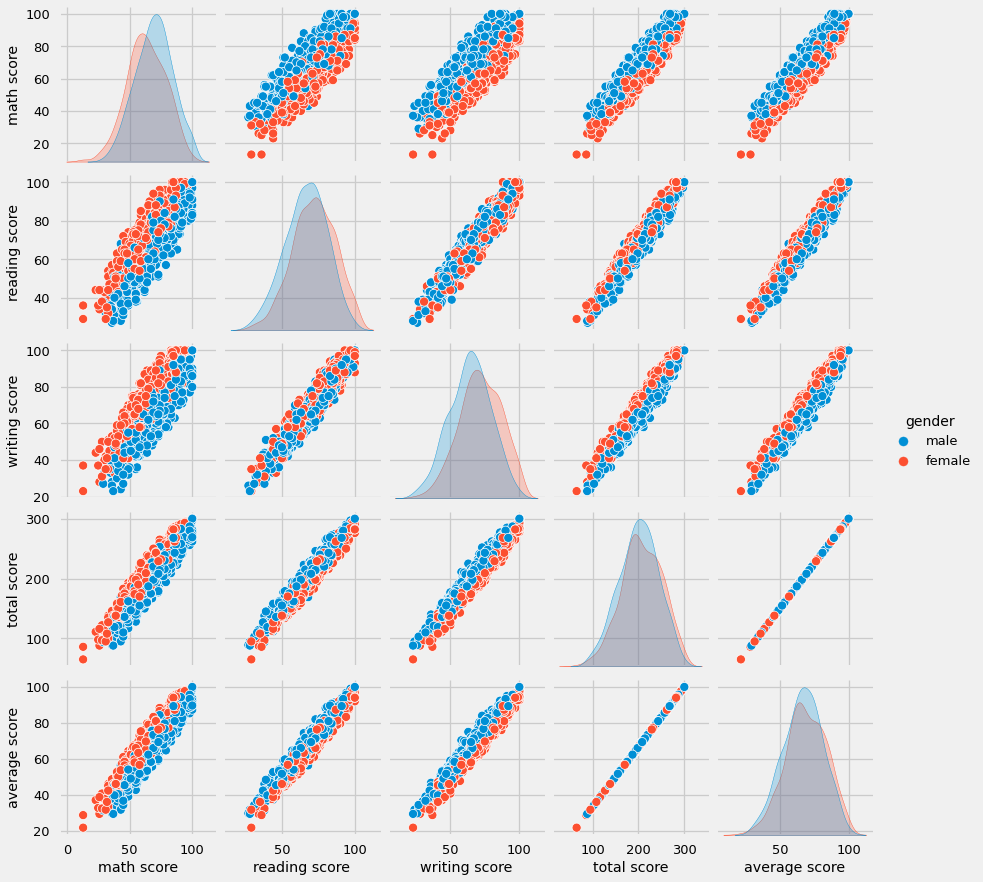

In [82]:
sns.pairplot(df, hue = 'gender')
plt.show()

# Insights

# Conclusions